# Pandas (and matplotlib) in Action

Import our libraries:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

(Remember, you can just copy the code above and past it into a new notebook in order to get started)

## First real example: the weather! ##

Before we try using pandas with word counts, let's look at some more typical data. Here is a dataset of several years of hourly weather and pollution readings in Beijing: the [Beijing PM2.5 data set](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data). It's from the UCI Machine Learning Repository, which I mentioned last class.

To start, download the CSV file using **[this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv)** and **save it in the same folder as your Jupyter Notebook.** 

If you're curious the people who produced the data also wrote a paper on it:

> [Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.](http://www.stat-center.pku.edu.cn/Stat/Uploads/Files/[20160114_1120]Beijing%20Air-Quality%20Assessment%20Report.pdf).
    
The paper has some technical content, but overall it's very readable and skimming it will help you understand the data a bit better. (Data biography alert!) 

The larger point, though, is that pandas makes it *very* easy to use data in CSV format. Just use the `read_csv()` function and pass it the filename of your data:

In [3]:
df = pd.read_csv("./PRSA_data_2010.1.1-2014.12.31.csv")

Pandas does a good job of guessing the correct data types for the values in the CSV file. (If Pandas gets it wrong, though, don't lose hope: [here's a good overview of strategies you can use to clean it up](https://github.com/KarrieK/pandas_data_cleaning).)

Let's take a look at the DataFrame we ended up with:

In [4]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


You can see that because there are so many rows in this DataFrame (43,824!), Pandas shows only a subset. But it's enough for us to get an idea of what the DataFrame looks like.

The `.info()` method shows us the rows and their data types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


The `int64`, `float64`, etc. data types are specific to Pandas, and are not the same thing as their regular Python equivalent. (Actually, they're specific to [Numpy](http://www.numpy.org/), but that's a different story.)

Of course, Pandas can't tell us what the data in these columns *mean*. For that, we need to consult the documentation that accompanies the data. Copying and pasting from the web page linked to above, here are the meanings for each field:

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* pm2.5: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point (deg C)
* TEMP: Temperature (deg C)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain

> Note that these aren't *universal* names for these fields. You can't expect to download a different data set from another set of researchers that records similar phenomena and expect that file to use (e.g.) `TEMP` as the column name for temperature.

As with Series in general, we can grab one of these columns and use `.describe()` to get a general overview of what data it contains:

In [11]:
df["pm2.5"].describe()

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

This tells us, e.g., that the "average" level of PM2.5 concentration in Beijing over the four-year period of the data was 98.6, with half of days being over 72 and half under. The highest PM2.5 recorded in the data was 994.

Looking at the plot for the `pm2.5` column, you can kind of make out yearly cycles in PM2.5 concentration:

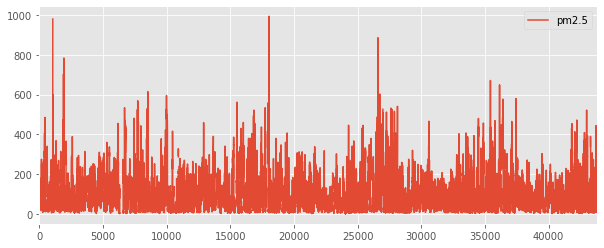

In [12]:
df.plot(y="pm2.5")

We can do the same analysis with the other fields. For example, here's a plot of temperature readings for each hour:

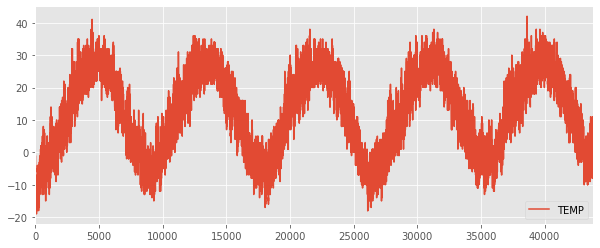

In [13]:
df.plot(y="TEMP")

Plotting these two together shows an interesting pattern, maybe:

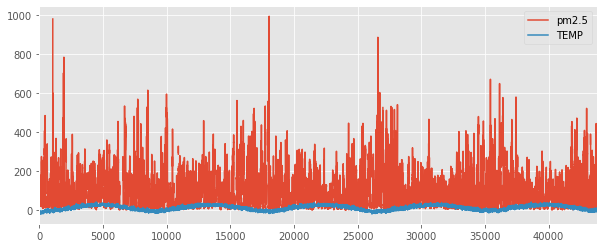

In [14]:
df.plot(y=["pm2.5", "TEMP"])

It looks like when temperature dips, pm2.5 spikes! (There are various statistical ways to confirm this suspicion, but for now we're going to stick with drawing the graphs.)

### Histograms

I like histograms for a quick overview of how your data are *distributed*. Understanding distribution helps you better reason about how often particular values are found in your data, and helps you easily formulate hypotheses about the phenomena your data is tracking. 

Let's look at a histogram of temperature data in our Beijing data set, using the `hist` plot kind:

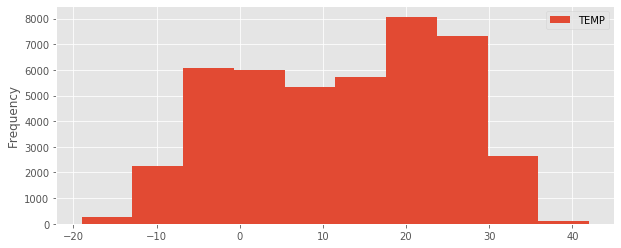

In [15]:
df.plot(kind="hist", y="TEMP")

Each bar in this graph corresponds to a "bin" of values surrounding the value on the X axis. When drawing a histogram, Pandas looks at each item in the data and puts it in the bin corresponding to the closest value. So for example, the graph above tells us that there are a lot of temperature readings (~8000) around 20 degrees C, but very few (less than 300) readings around 40 degrees C. You can increase the "resolution" of the histogram by providing a `bins` named parameter:

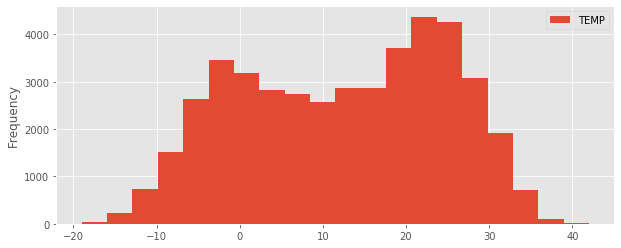

In [16]:
df.plot(kind="hist", y="TEMP", bins=20)

From this graph, we might hypothesize that a way to characterize Beijing temperatures is that they mostly cluster in either the 20—30 degrees C range, or the -5 to +5 degrees C range. Temperatures above 40 degrees C or below -20 degrees C are rare. The histogram for temperatures looks very different from the histogram for PM2.5:

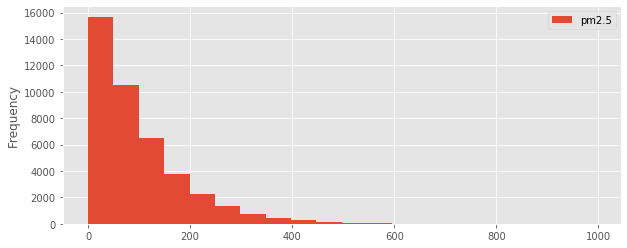

In [17]:
df.plot(kind="hist", y="pm2.5", bins=20)

This histogram shows that while there are a number of outliers, by far most of the PM2.5 readings are in the 0–200 range.

### Scatter plots

A scatter plot is an easy way to confirm your suspicion that two columns in your data set are somehow related. In a scatter plot, you select two columns, and every row in the data set becomes a point in a two-dimensional space, based on the value of those two columns in the row. You need to specify both columns using the `x` and `y` named parameters. So, for example, here's a scatter plot with temperature and dew point:

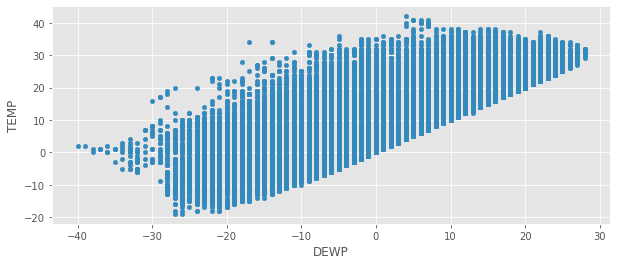

In [18]:
df.plot(kind="scatter", x="DEWP", y="TEMP")

Each dot in this scatterplot represents a row from the DataFrame. (Sometimes these dots are so dense that they appear to form solid masses or lines.) This scatter plot shows that as the temperature rises, so does the dew point ([as you might expect from the definition of dew point](https://en.wikipedia.org/wiki/Dew_point)). One way to talk about this relationship is to say that the values in these two columns are *correlated*.

However, drawing a scatter plot of PM2.5 concentration with the cumulative wind speed shows an inverse relationship:

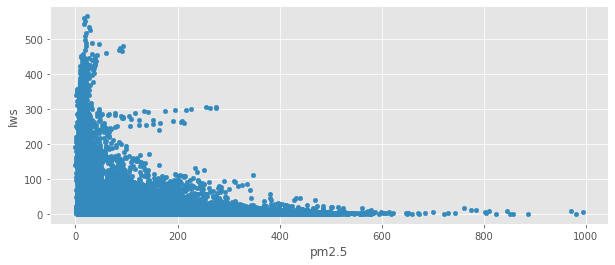

In [19]:
df.plot(kind="scatter", x="pm2.5", y="Iws")

You might interpret this graph as an indication that in general, as the wind speed goes up, the PM2.5 concentration falls. (This is intuitively true, and the authors of the paper go into a bit more detail about this effect in particular.) A scatter plot of PM2.5 and dew point also shows a correlation:

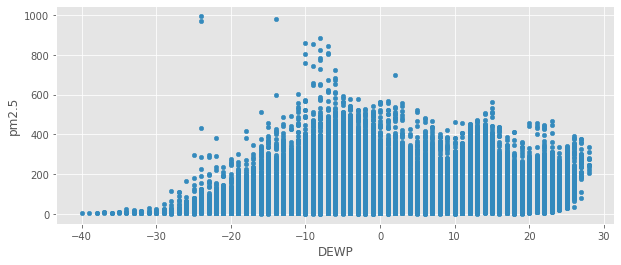

In [20]:
df.plot(kind="scatter", x="DEWP", y="pm2.5")

Again, this is a Pandas tutorial, not a statistics tutorial, so take these characterizations with a grain of salt. My goal here is to show you how histograms and scatter plots are good starting points for getting a "feel" for your data and how the variables might be related.

Note that this approach is also helpful for things like word counts or topics (over time, in different subsets of a corpus, in two separate corpora, etc) as much as it does for numbers.

### Answering questions with selection

Let's say we wanted to find out how many readings in the data had a PM2.5 concentration of greater than 500. One easy way to do this is to use Boolean indexing, as discussed last class. The following expression gives us a Boolean Series, with True values for every row with a PM2.5 greater than 400:

In [21]:
df["pm2.5"] > 400

0        False
1        False
2        False
3        False
4        False
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Name: pm2.5, Length: 43824, dtype: bool

And then we can use that to subscript the DataFrame, giving us a new DataFrame with only the rows that meet the condition:

In [22]:
df[df["pm2.5"] > 400]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
412,413,2010,1,18,4,407.0,-13,-11.0,1028.0,NW,7.60,0,0
427,428,2010,1,18,19,408.0,-7,-3.0,1025.0,SE,0.89,0,0
428,429,2010,1,18,20,435.0,-5,-2.0,1026.0,cv,0.89,0,0
429,430,2010,1,18,21,403.0,-5,-1.0,1026.0,NW,1.79,0,0
431,432,2010,1,18,23,402.0,-6,-1.0,1026.0,cv,0.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42982,42983,2014,11,26,22,502.0,1,2.0,1020.0,cv,1.34,0,0
42983,42984,2014,11,26,23,522.0,1,2.0,1020.0,cv,2.23,0,0
42984,42985,2014,11,27,0,470.0,1,2.0,1021.0,cv,3.12,0,0
42985,42986,2014,11,27,1,439.0,0,2.0,1022.0,NW,3.13,0,0


Pandas tells us that there are 545 such rows. With this limited DataFrame, we can still draw plots! So, for example, if we wanted to see a temperature histogram just for these days:

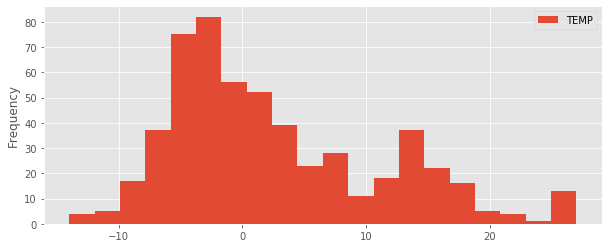

In [23]:
df[df["pm2.5"] > 400].plot(kind="hist", y="TEMP", bins=20)

Comparing this distribution to the rows where PM2.5 is less than 400:

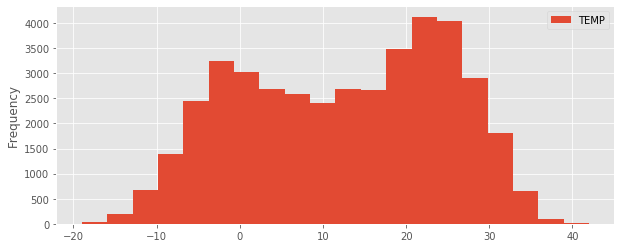

In [24]:
df[df["pm2.5"] < 400].plot(kind="hist", y="TEMP", bins=20)

You can see that the two distributions are quite different, with the temperatures on days with high PM2.5 concentrations being lower on average.

### Value counts and bar charts

The `cbwd` indicates the prevailing wind direction, which the researchers have narrowed down to four distinct values: NE (northeast), NW (northwest), SE (southeast) and "cv" ("calm or variable"). They outline the reasons for recording the data this way in their paper. The values in this column, unlike the values in the other columns, consist of a discrete set, rather than continuous numbers. As such, Pandas will be confused if we ask for a plot:

In [25]:
df["cbwd"].plot()

TypeError: no numeric data to plot

The "no numeric data to plot" error is Pandas saying, "hey you wanted me to draw a graph, but there are no numbers in this field, what gives." Probably the best way to visualize discrete values is by *counting them* and then drawing a bar graph. As discussed earlier, the `.value_counts()` method returns a Series that counts how many times each value occurs in a column:

In [26]:
df["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

Plotting this data as a bar chart shows us how many times each of these discrete values were recorded:

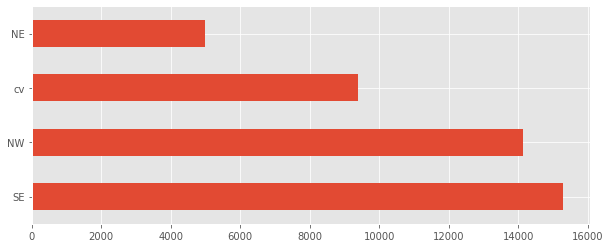

In [28]:
df["cbwd"].value_counts().plot(kind="barh")

This should already be getting you thinking about word counts, which is where we'll end up today. But before that, a few more topics to cover:

### Sorting

Sorting in pandas is quite easy. This is how you sort by a particular value:

In [29]:
sorted_df = df.sort_values(by=["pm2.5"], ascending=False)

sorted_df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
18049,18050,2012,1,23,1,994.0,-24,-12.0,1032.0,NW,4.92,0,0
1057,1058,2010,2,14,1,980.0,-14,-7.0,1029.0,cv,0.89,0,0
18050,18051,2012,1,23,2,972.0,-24,-12.0,1032.0,NW,8.05,0,0
26588,26589,2013,1,12,20,886.0,-8,-7.0,1023.0,cv,1.34,0,0
26590,26591,2013,1,12,22,858.0,-10,-9.0,1024.0,cv,0.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


### Group by

You can also group the data by a particular column in this way:

In [30]:
monthly_mean_df = df.groupby("month").mean()

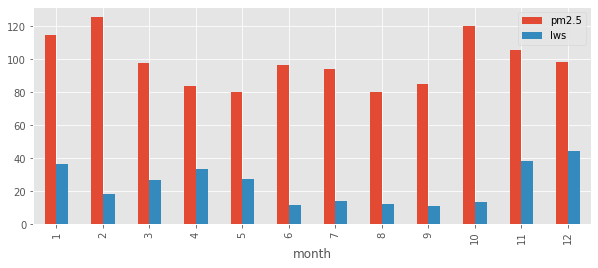

In [31]:
monthly_mean_df.plot(kind="bar", y=["pm2.5", "Iws"])

OK. Now we've learned most of the basic pandas / matplotlib functionality. Let's see what we can do with some word counts! 

## Second real example: Colored Conventions (for the last time). 

Unless you decide to use the Colored Conventions corpus for your final project, this is the last time we'll be using this dataset. So once again, let's create our list of docs for analysis. 

In [6]:
# create our list of docs

import os

base_dir = "./2019-09-ccp-corpus-0.3/ccprecords/" # NOTE: Your path may be different!!!

all_docs = [] # our list which will store the text of each doc; empty for now

docs = os.listdir(base_dir) # get a list of all the files in the directory

docs.sort() # imprecise but good enough for a tutorial

for doc in docs: # iterate through the docs
    if not doc.startswith('.'): # get only the .txt files
        with open(base_dir + doc, "r", encoding="utf-8") as file: # force unicode conversion to keep PCs happy
            text = file.read() # read in the file as a single text string
            all_docs.append(text) # append it to the all_docs list

# lastly, just check the length of all_docs to see if it's 147
len(all_docs)

147

Next, we'll use the scikit-learn CountVectorizer to count the words in each document:

In [7]:
# use the scikit-learn countvectorizer to count our words

from sklearn.feature_extraction.text import CountVectorizer

#instantiate CountVectorizer()
cv=CountVectorizer(stop_words='english') # using stopwords this time
 
# this steps returns word counts for the words in your docs 
word_count_vector=cv.fit_transform(all_docs)

# check shape
word_count_vector.shape

(147, 24930)

Remember: that last line tells us that we have 147 rows, one for each document in the corpus, and 24,930 columns, one for each word (minus single character words, which the tokenizer excludes, as well as the default stopwords, which we've indicated with the stop_words='english' parameter above).

But we also need to keep track of the actual words, not just the counts. The following code will do it:

In [8]:
# get_feature_names() -- very helpful! 
feature_names = cv.get_feature_names()
 
# shove them all into a dataframe; remember that scikitlearn uses sparse matrices, so we need to make them dense
df = pd.DataFrame(word_count_vector.T.todense(), index=feature_names)

df

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
00,0,0,0,0,0,0,2,3,0,0,...,0,0,0,0,0,0,0,0,0,60
000,0,1,0,0,0,1,4,4,0,1,...,0,0,4,7,0,0,18,0,0,53
001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# get a single row as a series for future analysis
# note use .iloc for indices, .loc for label

woman_counts = df.loc["woman"]

In [18]:
woman_counts.describe()

count    147.000000
mean       0.714286
std        2.566913
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       28.000000
Name: woman, dtype: float64

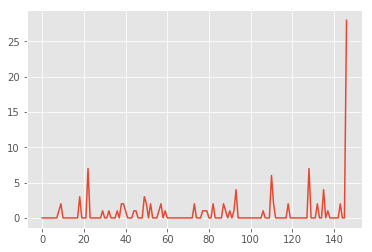

In [19]:
woman_counts.plot()

In [ ]:
# sometimes it's just easier to swap the columns and the rows; transpose does that 

In [22]:
transposed_df = df.transpose()

In [ ]:
# now we can use even easier indexing for plotting

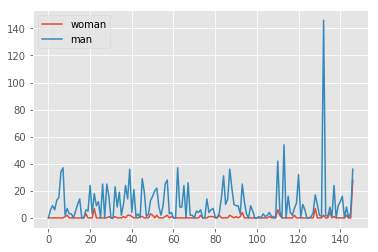

In [23]:
transposed_df.plot(y=["woman","man"])

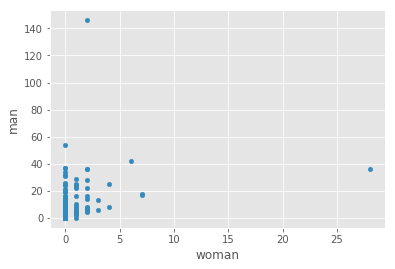

In [24]:
# look for correlation b/t them
transposed_df.plot(kind="scatter", x="woman", y="man")

Hm. Not much correlation. Also, that was slow! 

Can you create a new dataframe with only the records that contain the word "woman"?

In [26]:
only_woman = transposed_df[transposed_df["woman"] > 0]
only_woman

,00,000,001,002,009,01,012,013,017,02,...,zion,zodiac,zone,zorilla,zorillia,zuille,zuleta,zureveld,zymotic,ægis
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, only 38 of the meeting minutes mention women.

Can you sort the records by how many mentions of "woman" appear?


In [2]:
sorted_ow = only_woman.sort_values(by=["woman"], ascending=False)

sorted_ow

NameError: name 'only_woman' is not defined

What other questions might you ask? where might you go from here?



## Other resources

* [Greg Reda's Pandas Introduction](http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/) is fantastic and I borrowed many ideas from it. Thanks Greg!
* [A great gist with reminders for Pandas indexing syntax](https://gist.github.com/why-not/4582705)